## Bike Sharing System

### Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

The Company want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands <br>
<br>
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

## Reading and Understanding the Data

### Importing Libraries

In [1]:
# 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the data
bikeSharing = pd.read_csv('D:/Upgrad/course_4/module2/day.csv')
bikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bikeSharing.shape

(730, 16)

In [4]:
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# percentage of missing values in each column
round(100*(bikeSharing.isnull().sum()/len(bikeSharing.index)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

### Droping columns  which are not useful

- instant: record index, which is of no use
- dteday: As we already have columns 'year', 'month', 'weekday','weekend' so there is no need of this column what significant from this column is only 'day'
- casual and registered column as we already have data of this column in 'cnt'


In [6]:
bikeSharing['days'] = (pd.to_datetime(bikeSharing['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [7]:
# Droping columns
bikeSharing.drop(['instant'], axis = 1, inplace = True)

bikeSharing.drop(['dteday'], axis = 1, inplace = True)

bikeSharing.drop(['casual'], axis = 1, inplace = True)
bikeSharing.drop(['registered'], axis = 1, inplace = True)

In [8]:
bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [9]:
bikeSharing.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849,364.500000
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647,210.877136
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,182.250000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,364.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,546.750000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,729.000000


#### Visualising 

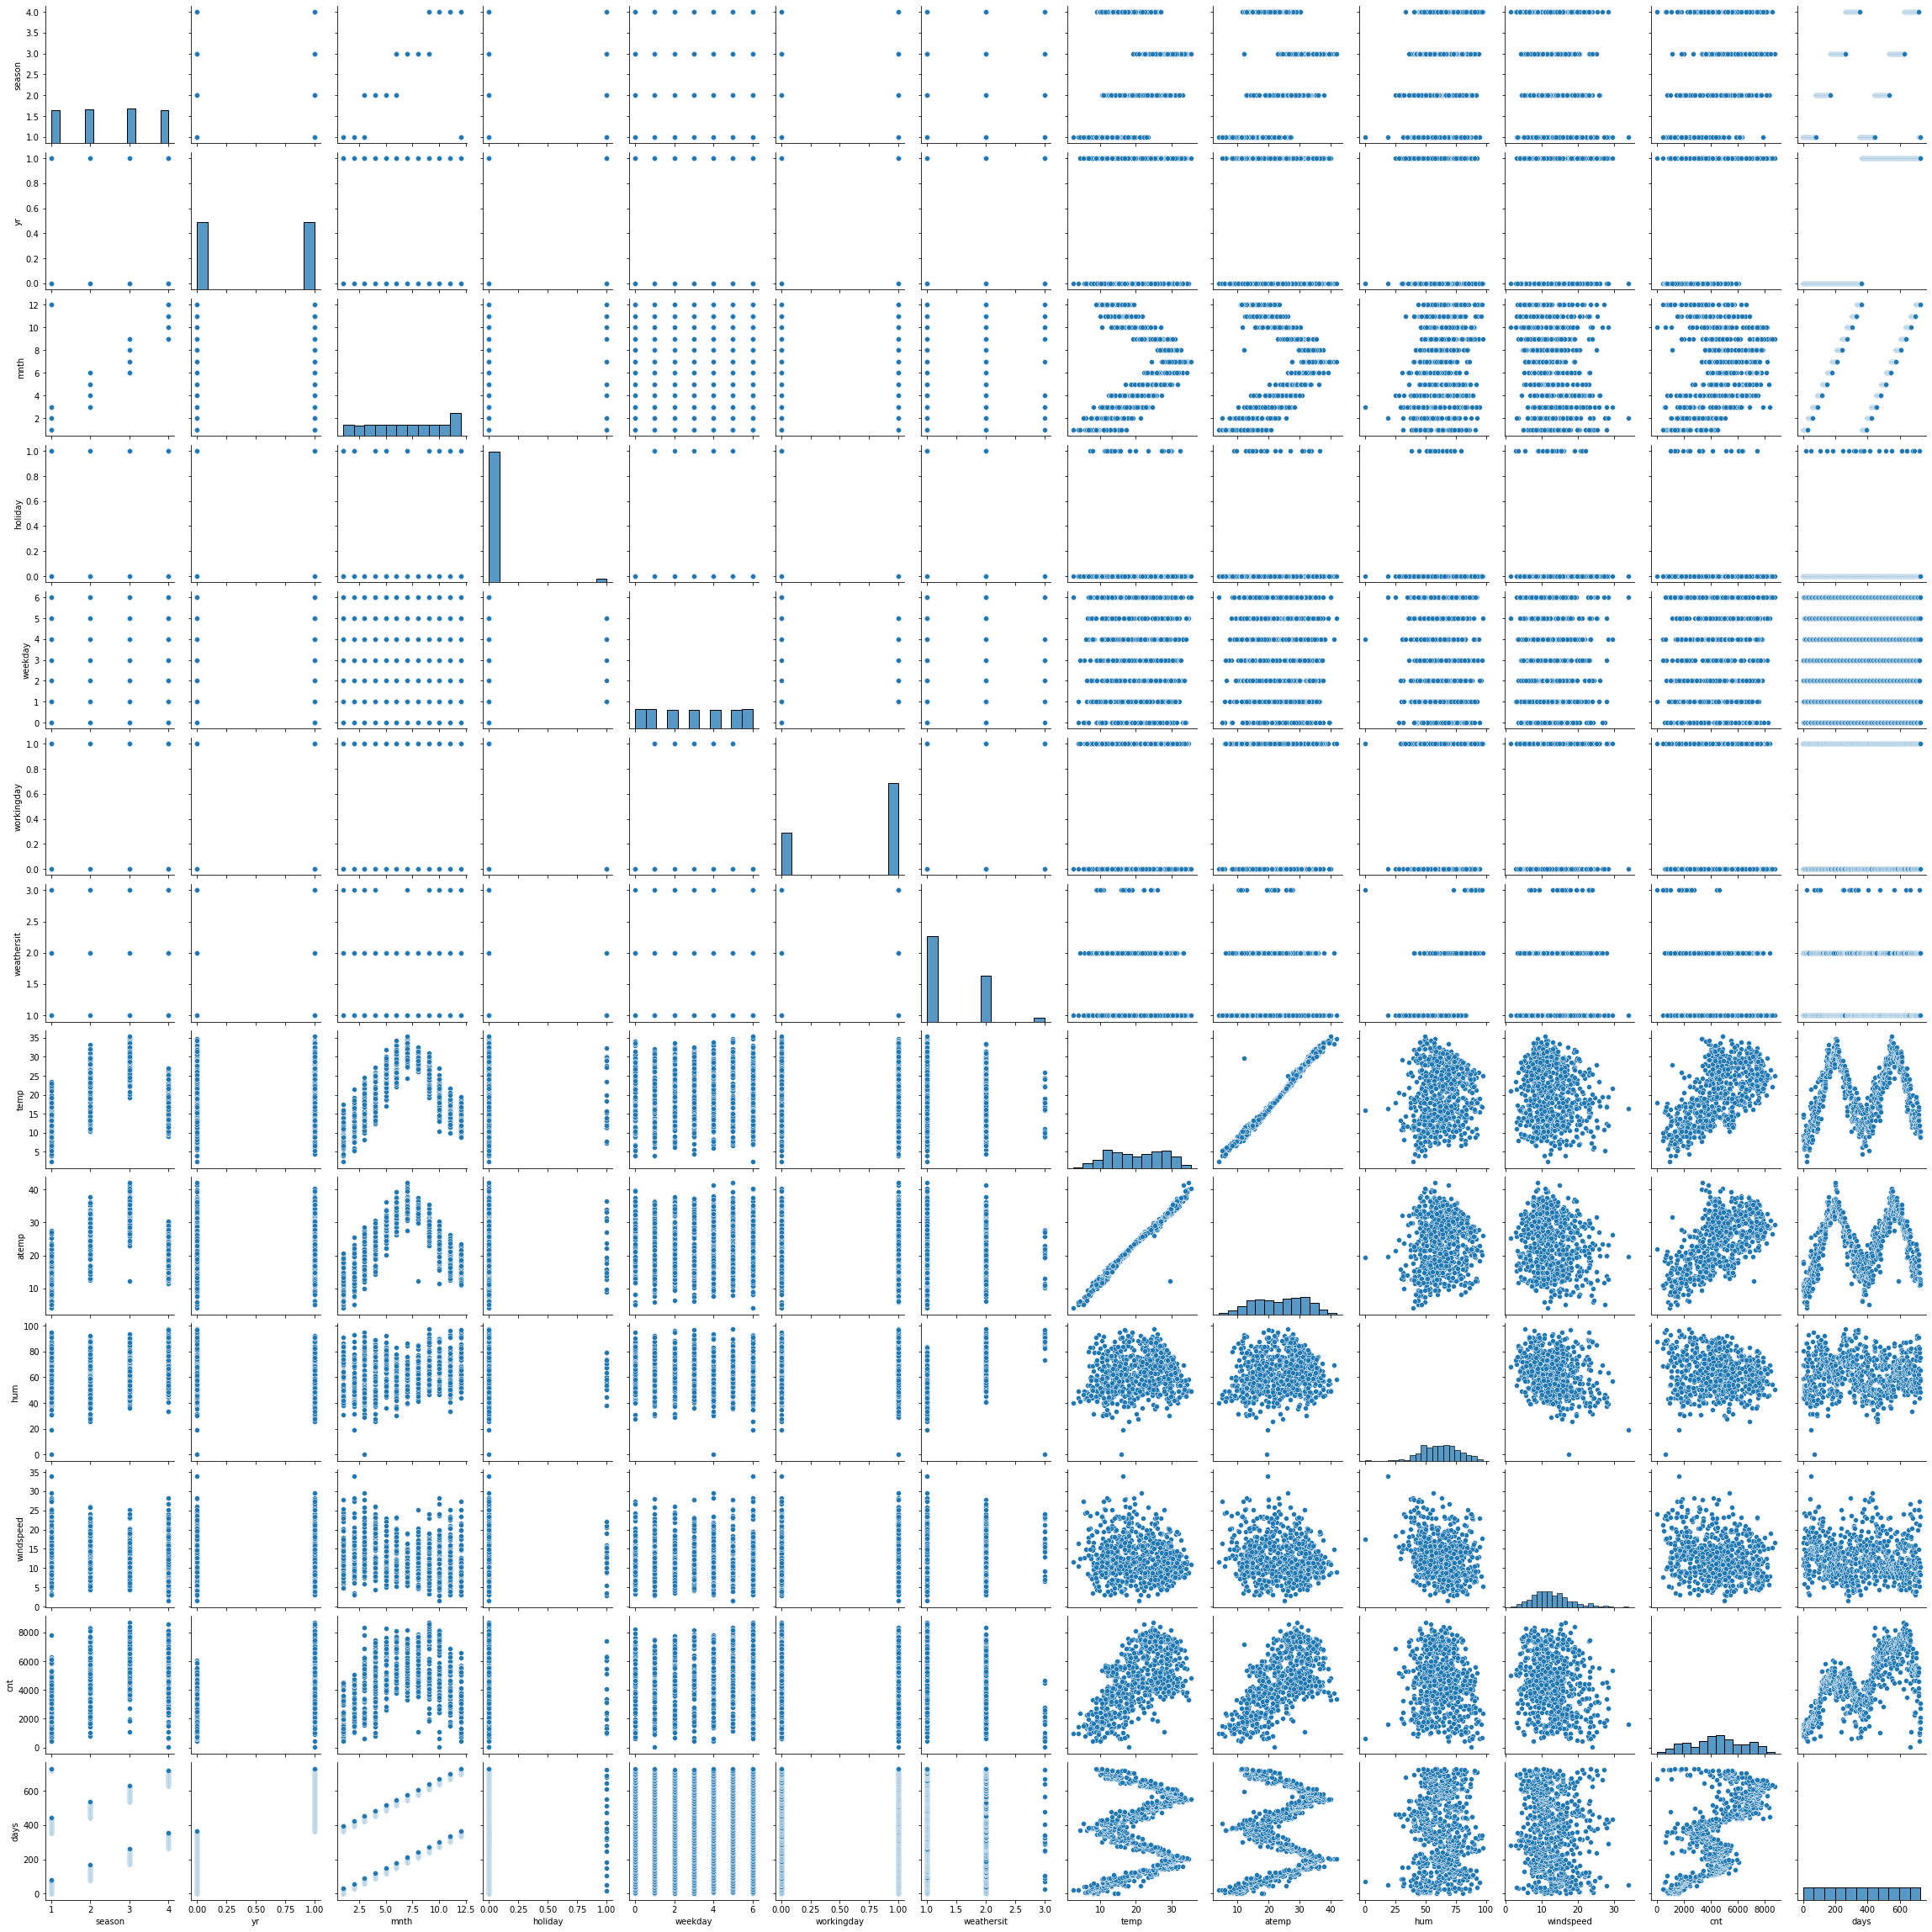

observation:
"temp" and "atemp" are highly correlated with each other
'temp' and 'atemp' are highly correlated with 'cnt'


In [10]:
sns.pairplot(bikeSharing)
plt.show()
print('observation:')
print('"temp" and "atemp" are highly correlated with each other')
print("'temp' and 'atemp' are highly correlated with 'cnt'")

In [11]:
bikeSharing.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
days          730
dtype: int64

In [12]:
bikeSharing['season'].replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'}, inplace=True)
bikeSharing['weathersit'].replace({1:'Clear', 2:'Cloudy', 3:'Thunderstorm'}, inplace=True)
bikeSharing['weekday'].replace({0:'Mon', 1:'Tues', 2:'Wed', 3:'Thrus', 4:'Fri', 5:'Sat', 6:'Sun'}, inplace=True)
bikeSharing['mnth'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}, inplace=True)
bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days
0,spring,0,Jan,0,Sun,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,Jan,0,Mon,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,Jan,0,Tues,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,Jan,0,Wed,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,Jan,0,Thrus,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,4


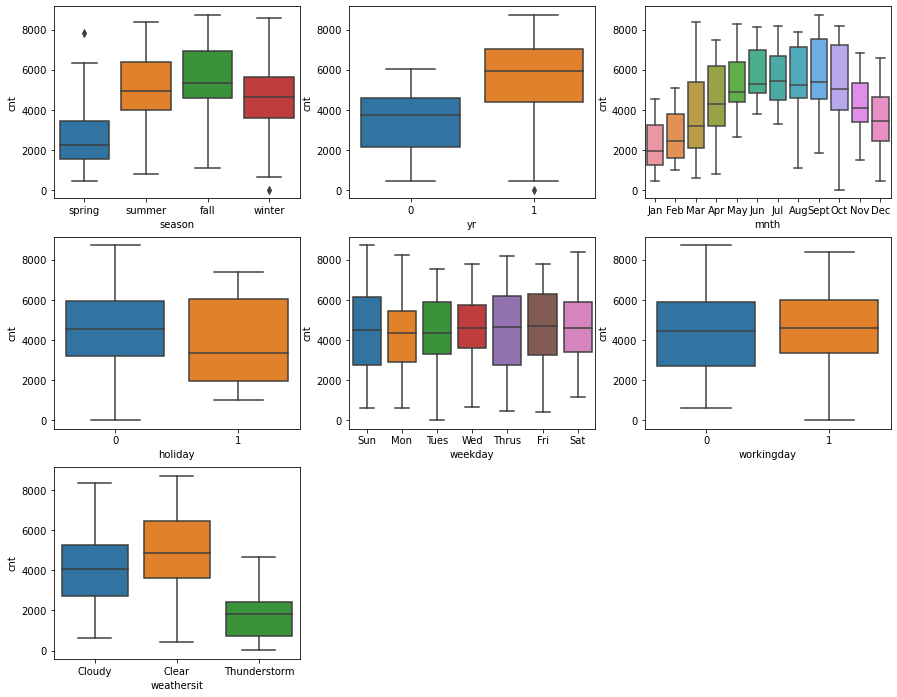

Observations:
- Season 3 : has highest demand for bikes
- Bike demand will grow from next year(i.e 2019)
- Demand for bike is continously growing till 7th month(june), 9th month(September) has the highest demand and after that      demand has fallen
- Demand has decrease when there is holiday
- Demand is almost equal for weekdays
- Demand for bikes is more when the weather is more Clear, Few clouds, Partly cloudy, Partly cloudy


In [13]:
#Visualising the categorical variables
# vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 12))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=bikeSharing)
plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=bikeSharing)
plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=bikeSharing)
plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=bikeSharing)
plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=bikeSharing)
plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt',data=bikeSharing)
plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt',data=bikeSharing)

plt.show()

print('Observations:')
print("- Season 3 : has highest demand for bikes")
print("- Bike demand will grow from next year(i.e 2019)")
print("- Demand for bike is continously growing till 7th month(june), 9th month(September) has the highest demand and after that      demand has fallen")
print("- Demand has decrease when there is holiday")
print("- Demand is almost equal for weekdays")
print("- Demand for bikes is more when the weather is more Clear, Few clouds, Partly cloudy, Partly cloudy")

In [14]:
bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days
0,spring,0,Jan,0,Sun,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,Jan,0,Mon,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,Jan,0,Tues,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,Jan,0,Wed,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,Jan,0,Thrus,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,4


## Preparing the data for Modelling

- <h5>Encoding</h5>
  - Converting binary vars to 1/0 <br>
  - Other categorical vars to dummy vars
- <h5>Splitting into Train and Test </h5>
-<h5>Rescaling the variables </h5>

### Dummy Variables

In [15]:
# Creating Dummy variables for columns 'season', 'mnth', 'weekday', 'weathersit'
bikeSharing = pd.get_dummies(columns=['season','mnth','weekday','weathersit'], data=bikeSharing, drop_first=True)
bikeSharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thrus,weekday_Tues,weekday_Wed,weathersit_Cloudy,weathersit_Thunderstorm
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,1,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,1,0,0,0,0


### Splitting into train and test

In [16]:
df_train, df_test = train_test_split(bikeSharing, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 31)
(220, 31)


In [17]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thrus,weekday_Tues,weekday_Wed,weathersit_Cloudy,weathersit_Thunderstorm
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,576,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,426,1,...,0,0,0,0,1,0,0,0,1,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,728,1,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,482,0,...,0,0,0,0,1,0,0,0,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,111,0,...,0,0,0,1,0,0,0,0,1,0


### Rescaling the Features

In [18]:
# Using MinMaxScaler
#1 Instantiate an Object
scaler = MinMaxScaler()

#Create a list of numeric variables
num_vars = ['temp','atemp','hum','windspeed','days','cnt']

#2 Fit on Data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thrus,weekday_Tues,weekday_Wed,weathersit_Cloudy,weathersit_Thunderstorm
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0.791209,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0.585165,1,...,0,0,0,0,1,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1.000000,1,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0.662088,0,...,0,0,0,0,1,0,0,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0.152473,0,...,0,0,0,1,0,0,0,0,1,0


In [19]:
df_train[num_vars].describe()

,temp,atemp,hum,windspeed,days,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.505055,0.513499
std,0.225858,0.212410,0.145846,0.169803,0.287907,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.255838,0.356420
50%,0.542596,0.529718,0.653714,0.296763,0.510989,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.757898,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Training the Model

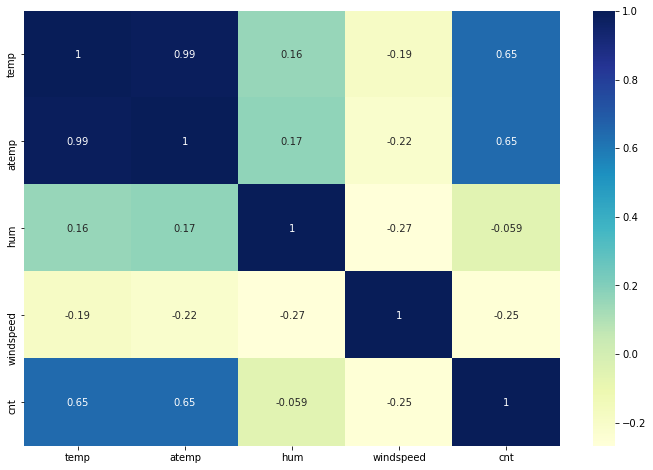

In [20]:
#heatmap
num_features = ["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(12,8))
sns.heatmap(df_train[num_features].corr(), annot=True,  cmap="YlGnBu")
plt.show()

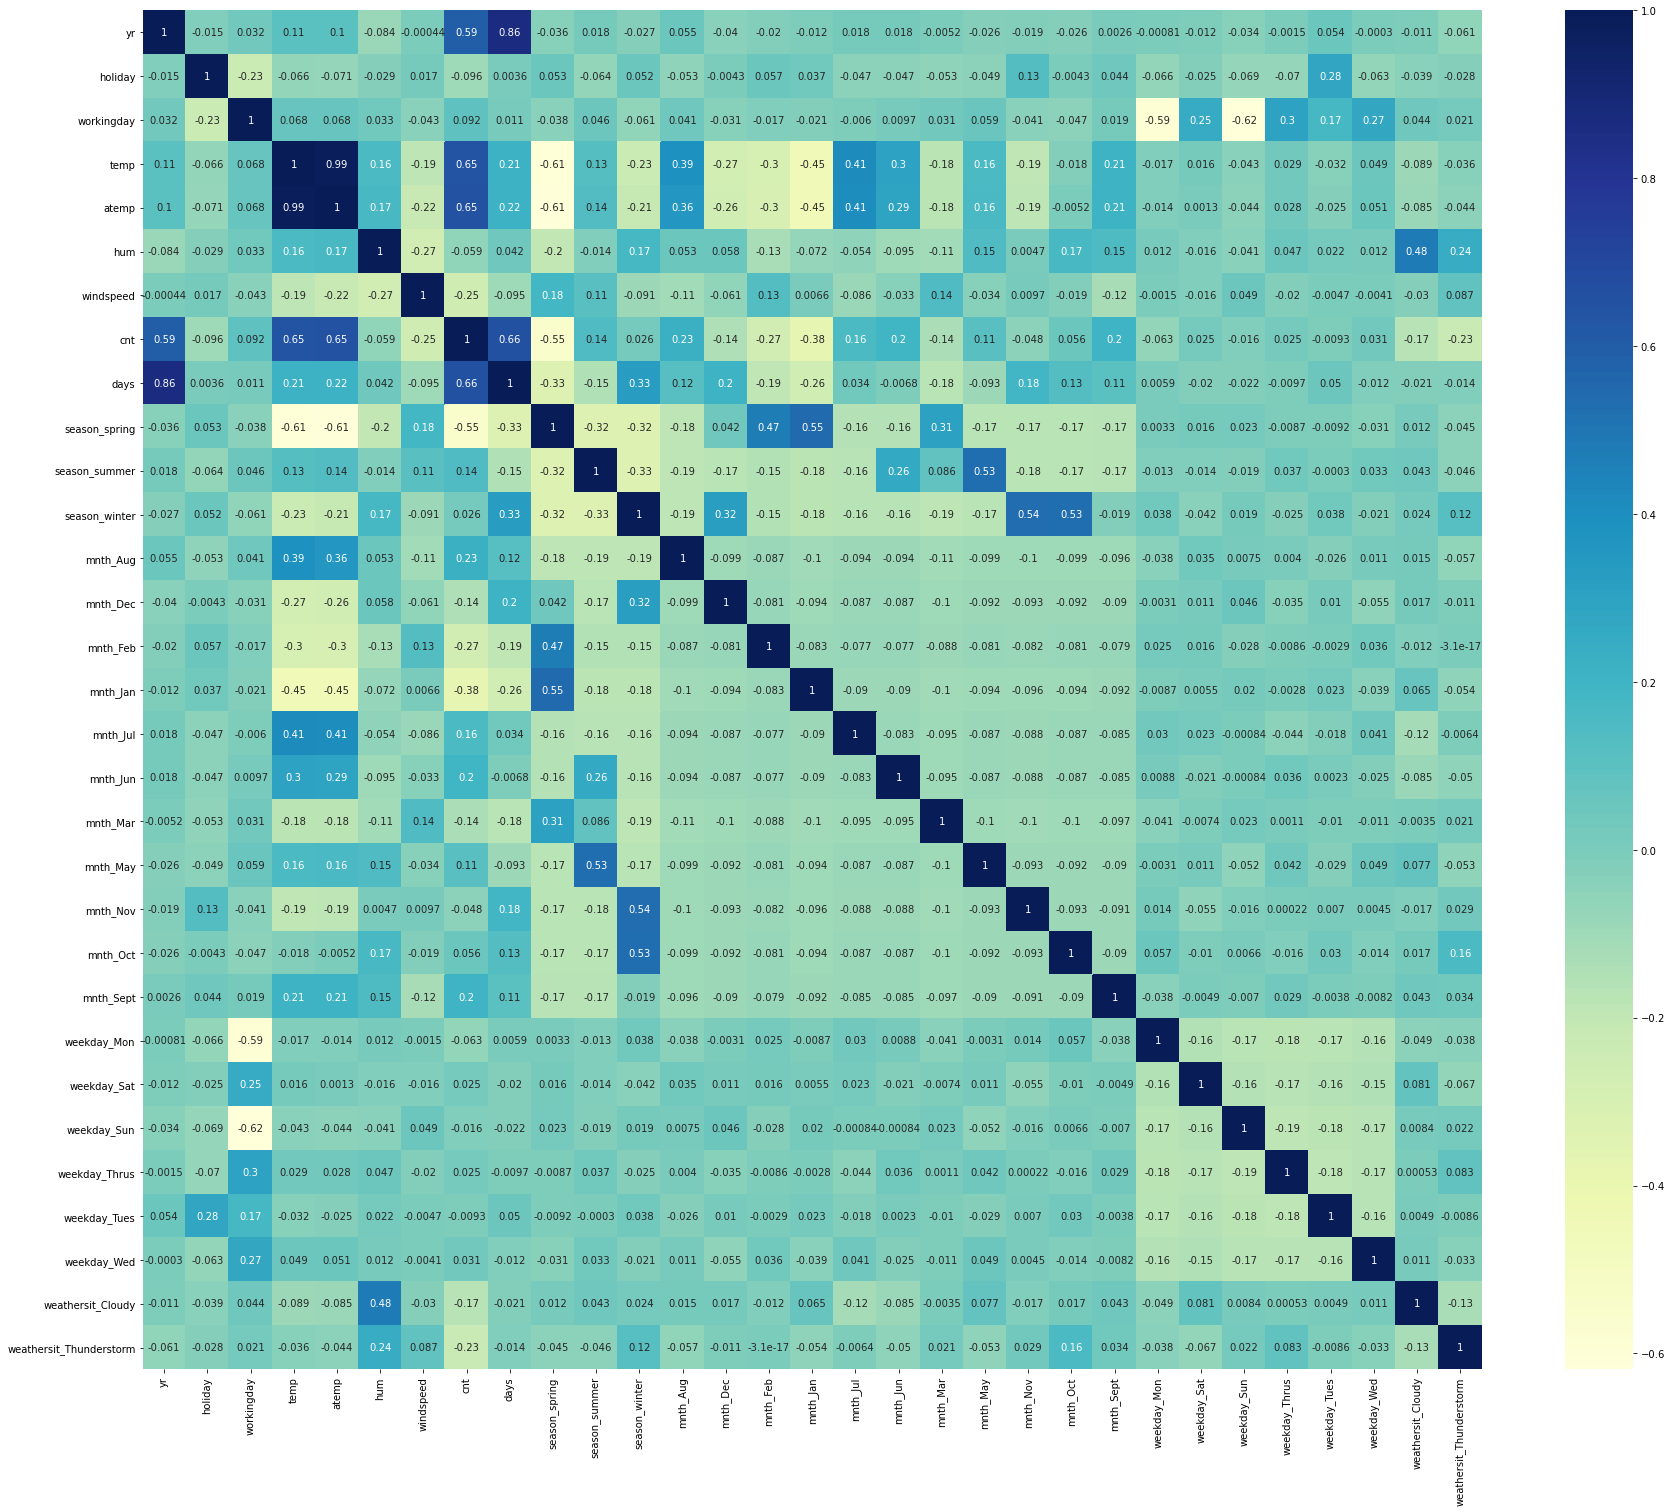

In [21]:
plt.figure(figsize=(30,25))
sns.heatmap(df_train.corr(), annot=True,  cmap="YlGnBu")
plt.show()

In [22]:
bikeSharing.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days', 'season_spring', 'season_summer', 'season_winter',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thrus',
       'weekday_Tues', 'weekday_Wed', 'weathersit_Cloudy',
       'weathersit_Thunderstorm'],
      dtype='object')

In [23]:
# X_train, y_train
y_train = df_train.pop('cnt')
X_train = df_train

### Adding all variables to the Model

In [24]:
#build a model with all variables
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     95.78
Date:                Tue, 31 Aug 2021   Prob (F-statistic):          2.62e-179
Time:                        19:45:10   Log-Likelihood:                 527.21
No. Observations:                 510   AIC:                            -994.4
Df Residuals:                     480   BIC:                            -867.4
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.2537      0.051      4.994      0.000       0.154       0.353
yr                          0.2968      0.164      1.806      0.071      -0.026       0.620
holiday                     0.0086      0.026      0.334      0.739      -0.042       0.059
workingday                  0.0941      0.016      6.058      0.000       0.064       0.125
temp                        0.3903      0.143      2.739      0.006       0.110       0.670
atemp                       0.0562      0.139      0.405      0.685      -0.216       0.329
hum                        -0.1510      0.039     -3.898      0.000      -0.227      -0.075
windspeed                  -0.1834      0.026     -6.945      0.000      -0.235      -0.131
days                       -0.1282      0.327     -0.392      0.695      -0.771       0.515
season_spring              -0.0460      0.030     -1.530      0.127      -0.105       0.013
season_summer               0.0425      0.026      1.619      0.106      -0.009       0.094
season_winter               0.1063      0.028      3.786      0.000       0.051       0.161
mnth_Aug                    0.0440      0.065      0.677      0.499      -0.084       0.172
mnth_Dec                   -0.0007      0.116     -0.006      0.995      -0.229       0.228
mnth_Feb                   -0.0422      0.042     -1.016      0.310      -0.124       0.039
mnth_Jan                   -0.0782      0.051     -1.528      0.127      -0.179       0.022
mnth_Jul                   -0.0164      0.054     -0.303      0.762      -0.123       0.090
mnth_Jun                    0.0169      0.037      0.452      0.651      -0.057       0.091
mnth_Mar                   -0.0034      0.028     -0.124      0.901      -0.058       0.051
mnth_May                    0.0307      0.025      1.232      0.219      -0.018       0.080
mnth_Nov                   -0.0012      0.105     -0.012      0.991      -0.208       0.205
mnth_Oct                    0.0412      0.093      0.444      0.657      -0.141       0.223
mnth_Sept                   0.1138      0.076      1.497      0.135      -0.036       0.263
weekday_Mon                 0.0483      0.016      2.935      0.003       0.016       0.081
weekday_Sat                 0.0098      0.016      0.626      0.532      -0.021       0.040
weekday_Sun                 0.1027      0.016      6.244      0.000       0.070       0.135
weekday_Thrus               0.0038      0.015      0.260      0.795      -0.025       0.033
weekday_Tues               -0.0118      0.015     -0.779      0.436      -0.042       0.018
weekday_Wed                -0.0087      0.015     -0.564      0.573      -0.039       0.022
weathersit_Cloudy          -0.0599      0.011     -5.706      0.000      -0.081      -0.039
weathersit_Thunderstorm    -0.2554      0.027  

### Cheking VIF

In [25]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,days,573.81
0,yr,437.39
2,workingday,178.07
12,mnth_Dec,67.60
3,temp,67.01
19,mnth_Nov,56.40
4,atemp,56.18
20,mnth_Oct,43.02
24,weekday_Sun,40.56
22,weekday_Mon,37.36


In [26]:
X = X_train.drop('days',axis=1)

In [27]:
X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Tue, 31 Aug 2021   Prob (F-statistic):          2.81e-180
Time:                        19:45:10   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.2394      0.035      6.761      0.000       0.170       0.309
yr                          0.2325      0.008     28.794      0.000       0.217       0.248
holiday                     0.0051      0.024      0.210      0.833      -0.042       0.052
workingday                  0.0904      0.012      7.292      0.000       0.066       0.115
temp                        0.3880      0.142      2.727      0.007       0.108       0.668
atemp                       0.0590      0.138      0.426      0.670      -0.213       0.331
hum                        -0.1520      0.039     -3.938      0.000      -0.228      -0.076
windspeed                  -0.1836      0.026     -6.962      0.000      -0.235      -0.132
season_spring              -0.0454      0.030     -1.511      0.131      -0.104       0.014
season_summer               0.0424      0.026      1.617      0.107      -0.009       0.094
season_winter               0.1071      0.028      3.826      0.000       0.052       0.162
mnth_Aug                    0.0223      0.034      0.657      0.511      -0.044       0.089
mnth_Dec                   -0.0443      0.034     -1.316      0.189      -0.110       0.022
mnth_Feb                   -0.0323      0.033     -0.980      0.327      -0.097       0.032
mnth_Jan                   -0.0631      0.034     -1.876      0.061      -0.129       0.003
mnth_Jul                   -0.0327      0.035     -0.931      0.352      -0.102       0.036
mnth_Jun                    0.0060      0.025      0.241      0.810      -0.043       0.055
mnth_Mar                    0.0016      0.025      0.063      0.950      -0.047       0.050
mnth_May                    0.0255      0.021      1.208      0.228      -0.016       0.067
mnth_Nov                   -0.0398      0.036     -1.093      0.275      -0.111       0.032
mnth_Oct                    0.0077      0.036      0.215      0.830      -0.063       0.078
mnth_Sept                   0.0868      0.032      2.711      0.007       0.024       0.150
weekday_Mon                 0.0448      0.014      3.239      0.001       0.018       0.072
weekday_Sat                 0.0097      0.016      0.623      0.534      -0.021       0.040
weekday_Sun                 0.0991      0.014      7.274      0.000       0.072       0.126
weekday_Thrus               0.0038      0.015      0.261      0.794      -0.025       0.033
weekday_Tues               -0.0119      0.015     -0.785      0.433      -0.042       0.018
weekday_Wed                -0.0087      0.015     -0.564      0.573      -0.039       0.022
weathersit_Cloudy          -0.0595      0.010     -5.701      0.000      -0.080      -0.039
weathersit_Thunderstorm    -0.2550      0.026     -9.631      0.000      -0.307      -0.203
===============================================

In [28]:
X = X.drop('mnth_Mar',axis=1)

In [29]:
X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.3
Date:                Tue, 31 Aug 2021   Prob (F-statistic):          2.75e-181
Time:                        19:45:10   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -998.2
Df Residuals:                     482   BIC:                            -879.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.2402      0.033      7.265      0.000       0.175       0.305
yr                          0.2325      0.008     28.824      0.000       0.217       0.248
holiday                     0.0053      0.024      0.221      0.825      -0.042       0.052
workingday                  0.0907      0.012      7.660      0.000       0.067       0.114
temp                        0.3877      0.142      2.729      0.007       0.109       0.667
atemp                       0.0588      0.138      0.425      0.671      -0.213       0.330
hum                        -0.1518      0.038     -3.950      0.000      -0.227      -0.076
windspeed                  -0.1837      0.026     -6.983      0.000      -0.235      -0.132
season_spring              -0.0447      0.028     -1.575      0.116      -0.101       0.011
season_summer               0.0421      0.026      1.637      0.102      -0.008       0.093
season_winter               0.1074      0.027      3.910      0.000       0.053       0.161
mnth_Aug                    0.0216      0.032      0.676      0.499      -0.041       0.084
mnth_Dec                   -0.0456      0.026     -1.755      0.080      -0.097       0.005
mnth_Feb                   -0.0338      0.022     -1.517      0.130      -0.078       0.010
mnth_Jan                   -0.0646      0.022     -2.892      0.004      -0.109      -0.021
mnth_Jul                   -0.0333      0.033     -0.999      0.318      -0.099       0.032
mnth_Jun                    0.0055      0.024      0.233      0.816      -0.041       0.052
mnth_May                    0.0251      0.020      1.268      0.205      -0.014       0.064
mnth_Nov                   -0.0410      0.031     -1.333      0.183      -0.102       0.019
mnth_Oct                    0.0065      0.031      0.213      0.831      -0.054       0.067
mnth_Sept                   0.0859      0.029      2.961      0.003       0.029       0.143
weekday_Mon                 0.0450      0.014      3.315      0.001       0.018       0.072
weekday_Sat                 0.0097      0.016      0.622      0.535      -0.021       0.040
weekday_Sun                 0.0993      0.013      7.501      0.000       0.073       0.125
weekday_Thrus               0.0038      0.015      0.259      0.796      -0.025       0.033
weekday_Tues               -0.0119      0.015     -0.788      0.431      -0.042       0.018
weekday_Wed                -0.0087      0.015     -0.568      0.570      -0.039       0.022
weathersit_Cloudy          -0.0595      0.010     -5.708      0.000      -0.080      -0.039
weathersit_Thunderstorm    -0.2550      0.026     -9.641      0.000      -0.307      -0.203
==============================================================================
Omnibus:                       84.449   Durbin-Watson:      

In [30]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,74.82
3,temp,66.84
4,atemp,55.99
22,weekday_Sun,17.21
20,weekday_Mon,16.19
7,season_spring,9.66
9,season_winter,9.13
8,season_summer,7.99
10,mnth_Aug,5.74
14,mnth_Jul,5.11


In [31]:
X = X.drop('holiday',axis=1)

In [32]:
X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.3
Date:                Tue, 31 Aug 2021   Prob (F-statistic):          2.75e-181
Time:                        19:45:10   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -998.2
Df Residuals:                     482   BIC:                            -879.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.2455      0.050      4.931      0.000       0.148       0.343
yr                          0.2325      0.008     28.824      0.000       0.217       0.248
workingday                  0.0854      0.027      3.201      0.001       0.033       0.138
temp                        0.3877      0.142      2.729      0.007       0.109       0.667
atemp                       0.0588      0.138      0.425      0.671      -0.213       0.330
hum                        -0.1518      0.038     -3.950      0.000      -0.227      -0.076
windspeed                  -0.1837      0.026     -6.983      0.000      -0.235      -0.132
season_spring              -0.0447      0.028     -1.575      0.116      -0.101       0.011
season_summer               0.0421      0.026      1.637      0.102      -0.008       0.093
season_winter               0.1074      0.027      3.910      0.000       0.053       0.161
mnth_Aug                    0.0216      0.032      0.676      0.499      -0.041       0.084
mnth_Dec                   -0.0456      0.026     -1.755      0.080      -0.097       0.005
mnth_Feb                   -0.0338      0.022     -1.517      0.130      -0.078       0.010
mnth_Jan                   -0.0646      0.022     -2.892      0.004      -0.109      -0.021
mnth_Jul                   -0.0333      0.033     -0.999      0.318      -0.099       0.032
mnth_Jun                    0.0055      0.024      0.233      0.816      -0.041       0.052
mnth_May                    0.0251      0.020      1.268      0.205      -0.014       0.064
mnth_Nov                   -0.0410      0.031     -1.333      0.183      -0.102       0.019
mnth_Oct                    0.0065      0.031      0.213      0.831      -0.054       0.067
mnth_Sept                   0.0859      0.029      2.961      0.003       0.029       0.143
weekday_Mon                 0.0398      0.030      1.323      0.186      -0.019       0.099
weekday_Sat                 0.0097      0.016      0.622      0.535      -0.021       0.040
weekday_Sun                 0.0940      0.030      3.138      0.002       0.035       0.153
weekday_Thrus               0.0038      0.015      0.259      0.796      -0.025       0.033
weekday_Tues               -0.0119      0.015     -0.788      0.431      -0.042       0.018
weekday_Wed                -0.0087      0.015     -0.568      0.570      -0.039       0.022
weathersit_Cloudy          -0.0595      0.010     -5.708      0.000      -0.080      -0.039
weathersit_Thunderstorm    -0.2550      0.026     -9.641      0.000      -0.307      -0.203
==============================================================================
Omnibus:                       84.449   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              23

In [33]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,434.60
3,atemp,383.07
4,hum,38.42
1,workingday,21.48
8,season_winter,11.30
6,season_spring,9.53
7,season_summer,7.94
21,weekday_Sun,6.22
9,mnth_Aug,5.93
19,weekday_Mon,5.87


In [34]:
X = X.drop('mnth_Oct',axis=1)

In [35]:
X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.4
Date:                Tue, 31 Aug 2021   Prob (F-statistic):          2.68e-182
Time:                        19:45:11   Log-Likelihood:                 527.10
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     483   BIC:                            -885.9
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.2475      0.049      5.072      0.000       0.152       0.343
yr                          0.2325      0.008     28.873      0.000       0.217       0.248
workingday                  0.0850      0.027      3.197      0.001       0.033       0.137
temp                        0.3882      0.142      2.736      0.006       0.109       0.667
atemp                       0.0589      0.138      0.427      0.670      -0.212       0.330
hum                        -0.1511      0.038     -3.951      0.000      -0.226      -0.076
windspeed                  -0.1835      0.026     -6.986      0.000      -0.235      -0.132
season_spring              -0.0460      0.028     -1.655      0.099      -0.101       0.009
season_summer               0.0400      0.024      1.684      0.093      -0.007       0.087
season_winter               0.1101      0.024      4.539      0.000       0.062       0.158
mnth_Aug                    0.0190      0.029      0.644      0.520      -0.039       0.077
mnth_Dec                   -0.0495      0.018     -2.687      0.007      -0.086      -0.013
mnth_Feb                   -0.0349      0.022     -1.608      0.108      -0.078       0.008
mnth_Jan                   -0.0657      0.022     -3.010      0.003      -0.109      -0.023
mnth_Jul                   -0.0360      0.031     -1.161      0.246      -0.097       0.025
mnth_Jun                    0.0043      0.023      0.187      0.852      -0.041       0.049
mnth_May                    0.0246      0.020      1.253      0.211      -0.014       0.063
mnth_Nov                   -0.0462      0.019     -2.426      0.016      -0.084      -0.009
mnth_Sept                   0.0827      0.025      3.336      0.001       0.034       0.131
weekday_Mon                 0.0394      0.030      1.316      0.189      -0.019       0.098
weekday_Sat                 0.0097      0.016      0.625      0.532      -0.021       0.040
weekday_Sun                 0.0936      0.030      3.134      0.002       0.035       0.152
weekday_Thrus               0.0038      0.015      0.261      0.794      -0.025       0.033
weekday_Tues               -0.0119      0.015     -0.791      0.429      -0.042       0.018
weekday_Wed                -0.0088      0.015     -0.569      0.570      -0.039       0.021
weathersit_Cloudy          -0.0596      0.010     -5.721      0.000      -0.080      -0.039
weathersit_Thunderstorm    -0.2548      0.026     -9.648      0.000      -0.307      -0.203
==============================================================================
Omnibus:                       83.679   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.048
Skew:                          -0.799   Prob(JB):                     6.74e-51
Kurtosi

In [36]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,433.58
3,atemp,383.07
4,hum,37.36
1,workingday,21.45
6,season_spring,9.38
8,season_winter,7.93
7,season_summer,7.06
20,weekday_Sun,6.20
18,weekday_Mon,5.85
5,windspeed,5.49


In [37]:
X = X.drop('mnth_Jun',axis=1)

In [38]:
X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     112.0
Date:                Tue, 31 Aug 2021   Prob (F-statistic):          2.55e-183
Time:                        19:45:11   Log-Likelihood:                 527.08
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     484   BIC:                            -892.1
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.2474      0.049      5.076      0.000       0.152       0.343
yr                          0.2323      0.008     29.009      0.000       0.217       0.248
workingday                  0.0854      0.026      3.226      0.001       0.033       0.137
temp                        0.3961      0.135      2.926      0.004       0.130       0.662
atemp                       0.0554      0.137      0.405      0.685      -0.213       0.324
hum                        -0.1520      0.038     -4.015      0.000      -0.226      -0.078
windspeed                  -0.1841      0.026     -7.081      0.000      -0.235      -0.133
season_spring              -0.0474      0.027     -1.771      0.077      -0.100       0.005
season_summer               0.0393      0.023      1.677      0.094      -0.007       0.085
season_winter               0.1086      0.023      4.756      0.000       0.064       0.153
mnth_Aug                    0.0157      0.024      0.662      0.508      -0.031       0.062
mnth_Dec                   -0.0490      0.018     -2.690      0.007      -0.085      -0.013
mnth_Feb                   -0.0343      0.021     -1.599      0.110      -0.077       0.008
mnth_Jan                   -0.0648      0.021     -3.045      0.002      -0.107      -0.023
mnth_Jul                   -0.0394      0.025     -1.598      0.111      -0.088       0.009
mnth_May                    0.0229      0.017      1.319      0.188      -0.011       0.057
mnth_Nov                   -0.0459      0.019     -2.421      0.016      -0.083      -0.009
mnth_Sept                   0.0804      0.021      3.744      0.000       0.038       0.123
weekday_Mon                 0.0399      0.030      1.339      0.181      -0.019       0.099
weekday_Sat                 0.0097      0.016      0.624      0.533      -0.021       0.040
weekday_Sun                 0.0942      0.030      3.168      0.002       0.036       0.153
weekday_Thrus               0.0039      0.015      0.266      0.790      -0.025       0.033
weekday_Tues               -0.0118      0.015     -0.785      0.433      -0.041       0.018
weekday_Wed                -0.0088      0.015     -0.570      0.569      -0.039       0.021
weathersit_Cloudy          -0.0595      0.010     -5.725      0.000      -0.080      -0.039
weathersit_Thunderstorm    -0.2548      0.026     -9.657      0.000      -0.307      -0.203
==============================================================================
Omnibus:                       83.300   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.416
Skew:                          -0.798   Prob(JB):                     2.51e-50
Kurtosis:                       5.864   Cond. No.                         89.3
====================

In [39]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,394.58
3,atemp,376.06
4,hum,36.59
1,workingday,21.28
6,season_spring,8.48
8,season_winter,6.84
7,season_summer,6.81
19,weekday_Sun,6.13
17,weekday_Mon,5.79
5,windspeed,5.38


In [40]:
X = X.drop('weekday_Thrus',axis=1)

In [41]:
X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.8
Date:                Tue, 31 Aug 2021   Prob (F-statistic):          2.42e-184
Time:                        19:45:11   Log-Likelihood:                 527.04
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     485   BIC:                            -898.2
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.2488      0.048      5.140      0.000       0.154       0.344
yr                          0.2323      0.008     29.038      0.000       0.217       0.248
workingday                  0.0857      0.026      3.245      0.001       0.034       0.138
temp                        0.3975      0.135      2.941      0.003       0.132       0.663
atemp                       0.0542      0.136      0.397      0.692      -0.214       0.322
hum                        -0.1517      0.038     -4.013      0.000      -0.226      -0.077
windspeed                  -0.1842      0.026     -7.092      0.000      -0.235      -0.133
season_spring              -0.0472      0.027     -1.768      0.078      -0.100       0.005
season_summer               0.0394      0.023      1.687      0.092      -0.006       0.085
season_winter               0.1088      0.023      4.772      0.000       0.064       0.154
mnth_Aug                    0.0157      0.024      0.664      0.507      -0.031       0.062
mnth_Dec                   -0.0492      0.018     -2.703      0.007      -0.085      -0.013
mnth_Feb                   -0.0342      0.021     -1.594      0.112      -0.076       0.008
mnth_Jan                   -0.0647      0.021     -3.045      0.002      -0.106      -0.023
mnth_Jul                   -0.0394      0.025     -1.598      0.111      -0.088       0.009
mnth_May                    0.0229      0.017      1.322      0.187      -0.011       0.057
mnth_Nov                   -0.0460      0.019     -2.431      0.015      -0.083      -0.009
mnth_Sept                   0.0804      0.021      3.748      0.000       0.038       0.123
weekday_Mon                 0.0381      0.029      1.314      0.190      -0.019       0.095
weekday_Sat                 0.0076      0.013      0.569      0.570      -0.019       0.034
weekday_Sun                 0.0924      0.029      3.193      0.001       0.036       0.149
weekday_Tues               -0.0139      0.013     -1.081      0.280      -0.039       0.011
weekday_Wed                -0.0109      0.013     -0.831      0.406      -0.037       0.015
weathersit_Cloudy          -0.0594      0.010     -5.728      0.000      -0.080      -0.039
weathersit_Thunderstorm    -0.2547      0.026     -9.664      0.000      -0.306      -0.203
==============================================================================
Omnibus:                       83.679   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.837
Skew:                          -0.801   Prob(JB):                     1.23e-50
Kurtosis:                       5.872   Cond. No.                         88.9
==============================================================================

Notes:
[1] Standard Errors assum

In [42]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,393.28
3,atemp,375.52
4,hum,36.40
1,workingday,20.92
6,season_spring,8.42
8,season_winter,6.78
7,season_summer,6.75
19,weekday_Sun,5.88
17,weekday_Mon,5.56
5,windspeed,5.38


In [43]:
X = X.drop('atemp',axis=1)

In [44]:
X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.1
Date:                Tue, 31 Aug 2021   Prob (F-statistic):          2.34e-185
Time:                        19:45:11   Log-Likelihood:                 526.96
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     486   BIC:                            -904.3
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.2482      0.048      5.134      0.000       0.153       0.343
yr                          0.2323      0.008     29.061      0.000       0.217       0.248
workingday                  0.0863      0.026      3.274      0.001       0.034       0.138
temp                        0.4489      0.038     11.686      0.000       0.373       0.524
hum                        -0.1510      0.038     -4.002      0.000      -0.225      -0.077
windspeed                  -0.1863      0.025     -7.322      0.000      -0.236      -0.136
season_spring              -0.0465      0.027     -1.745      0.082      -0.099       0.006
season_summer               0.0403      0.023      1.731      0.084      -0.005       0.086
season_winter               0.1097      0.023      4.841      0.000       0.065       0.154
mnth_Aug                    0.0150      0.024      0.635      0.525      -0.031       0.061
mnth_Dec                   -0.0491      0.018     -2.701      0.007      -0.085      -0.013
mnth_Feb                   -0.0342      0.021     -1.597      0.111      -0.076       0.008
mnth_Jan                   -0.0650      0.021     -3.060      0.002      -0.107      -0.023
mnth_Jul                   -0.0394      0.025     -1.600      0.110      -0.088       0.009
mnth_May                    0.0227      0.017      1.310      0.191      -0.011       0.057
mnth_Nov                   -0.0460      0.019     -2.431      0.015      -0.083      -0.009
mnth_Sept                   0.0804      0.021      3.752      0.000       0.038       0.123
weekday_Mon                 0.0387      0.029      1.335      0.183      -0.018       0.096
weekday_Sat                 0.0071      0.013      0.538      0.591      -0.019       0.033
weekday_Sun                 0.0929      0.029      3.218      0.001       0.036       0.150
weekday_Tues               -0.0138      0.013     -1.069      0.286      -0.039       0.012
weekday_Wed                -0.0109      0.013     -0.830      0.407      -0.037       0.015
weathersit_Cloudy          -0.0595      0.010     -5.739      0.000      -0.080      -0.039
weathersit_Thunderstorm    -0.2555      0.026     -9.732      0.000      -0.307      -0.204
==============================================================================
Omnibus:                       83.044   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.832
Skew:                          -0.795   Prob(JB):                     3.36e-50
Kurtosis:                       5.862   Cond. No.                         30.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,36.34
2,temp,24.19
1,workingday,20.88
5,season_spring,8.38
7,season_winter,6.72
6,season_summer,6.70
18,weekday_Sun,5.88
16,weekday_Mon,5.55
4,windspeed,5.13
8,mnth_Aug,3.27


In [46]:
X = X.drop('weekday_Sat',axis=1)

In [47]:
X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     127.9
Date:                Tue, 31 Aug 2021   Prob (F-statistic):          2.36e-186
Time:                        19:45:11   Log-Likelihood:                 526.81
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     487   BIC:                            -910.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.2512      0.048      5.235      0.000       0.157       0.345
yr                          0.2322      0.008     29.077      0.000       0.217       0.248
workingday                  0.0861      0.026      3.269      0.001       0.034       0.138
temp                        0.4484      0.038     11.686      0.000       0.373       0.524
hum                        -0.1516      0.038     -4.024      0.000      -0.226      -0.078
windspeed                  -0.1863      0.025     -7.327      0.000      -0.236      -0.136
season_spring              -0.0466      0.027     -1.753      0.080      -0.099       0.006
season_summer               0.0401      0.023      1.726      0.085      -0.006       0.086
season_winter               0.1099      0.023      4.851      0.000       0.065       0.154
mnth_Aug                    0.0152      0.024      0.645      0.520      -0.031       0.062
mnth_Dec                   -0.0492      0.018     -2.709      0.007      -0.085      -0.014
mnth_Feb                   -0.0340      0.021     -1.590      0.112      -0.076       0.008
mnth_Jan                   -0.0650      0.021     -3.066      0.002      -0.107      -0.023
mnth_Jul                   -0.0389      0.025     -1.583      0.114      -0.087       0.009
mnth_May                    0.0228      0.017      1.317      0.188      -0.011       0.057
mnth_Nov                   -0.0466      0.019     -2.472      0.014      -0.084      -0.010
mnth_Sept                   0.0803      0.021      3.747      0.000       0.038       0.122
weekday_Mon                 0.0363      0.029      1.268      0.205      -0.020       0.092
weekday_Sun                 0.0905      0.028      3.175      0.002       0.034       0.146
weekday_Tues               -0.0160      0.012     -1.310      0.191      -0.040       0.008
weekday_Wed                -0.0131      0.012     -1.052      0.293      -0.037       0.011
weathersit_Cloudy          -0.0591      0.010     -5.719      0.000      -0.079      -0.039
weathersit_Thunderstorm    -0.2565      0.026     -9.797      0.000      -0.308      -0.205
==============================================================================
Omnibus:                       82.702   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.333
Skew:                          -0.792   Prob(JB):                     4.32e-50
Kurtosis:                       5.862   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,36.34
2,temp,24.14
1,workingday,20.80
5,season_spring,8.36
6,season_summer,6.68
7,season_winter,6.68
17,weekday_Sun,5.81
16,weekday_Mon,5.49
4,windspeed,5.12
8,mnth_Aug,3.26


In [49]:
X = X.drop('mnth_Aug',axis=1)

In [50]:
X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     134.1
Date:                Tue, 31 Aug 2021   Prob (F-statistic):          2.47e-187
Time:                        19:45:11   Log-Likelihood:                 526.59
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     488   BIC:                            -916.0
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.2594      0.046      5.611      0.000       0.169       0.350
yr                          0.2324      0.008     29.128      0.000       0.217       0.248
workingday                  0.0863      0.026      3.282      0.001       0.035       0.138
temp                        0.4502      0.038     11.769      0.000       0.375       0.525
hum                        -0.1505      0.038     -4.001      0.000      -0.224      -0.077
windspeed                  -0.1864      0.025     -7.338      0.000      -0.236      -0.137
season_spring              -0.0564      0.022     -2.576      0.010      -0.099      -0.013
season_summer               0.0298      0.017      1.766      0.078      -0.003       0.063
season_winter               0.1009      0.018      5.663      0.000       0.066       0.136
mnth_Dec                   -0.0500      0.018     -2.758      0.006      -0.086      -0.014
mnth_Feb                   -0.0340      0.021     -1.591      0.112      -0.076       0.008
mnth_Jan                   -0.0650      0.021     -3.067      0.002      -0.107      -0.023
mnth_Jul                   -0.0498      0.018     -2.770      0.006      -0.085      -0.014
mnth_May                    0.0224      0.017      1.299      0.195      -0.012       0.056
mnth_Nov                   -0.0476      0.019     -2.534      0.012      -0.085      -0.011
mnth_Sept                   0.0716      0.017      4.303      0.000       0.039       0.104
weekday_Mon                 0.0364      0.029      1.275      0.203      -0.020       0.093
weekday_Sun                 0.0911      0.028      3.201      0.001       0.035       0.147
weekday_Tues               -0.0160      0.012     -1.317      0.188      -0.040       0.008
weekday_Wed                -0.0129      0.012     -1.040      0.299      -0.037       0.011
weathersit_Cloudy          -0.0588      0.010     -5.703      0.000      -0.079      -0.039
weathersit_Thunderstorm    -0.2573      0.026     -9.847      0.000      -0.309      -0.206
==============================================================================
Omnibus:                       83.893   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.497
Skew:                          -0.803   Prob(JB):                     8.87e-51
Kurtosis:                       5.875   Cond. No.                         28.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,35.48
2,temp,22.61
1,workingday,19.86
5,season_spring,6.09
16,weekday_Sun,5.52
15,weekday_Mon,5.30
4,windspeed,5.09
7,season_winter,4.45
6,season_summer,3.76
10,mnth_Jan,2.43


In [52]:
X = X.drop('hum',axis=1)

In [53]:
X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     135.8
Date:                Tue, 31 Aug 2021   Prob (F-statistic):          5.21e-185
Time:                        19:45:12   Log-Likelihood:                 518.36
No. Observations:                 510   AIC:                            -994.7
Df Residuals:                     489   BIC:                            -905.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1898      0.043      4.365      0.000       0.104       0.275
yr                          0.2360      0.008     29.329      0.000       0.220       0.252
workingday                  0.0861      0.027      3.223      0.001       0.034       0.139
temp                        0.4130      0.038     10.963      0.000       0.339       0.487
windspeed                  -0.1597      0.025     -6.418      0.000      -0.209      -0.111
season_spring              -0.0634      0.022     -2.863      0.004      -0.107      -0.020
season_summer               0.0266      0.017      1.551      0.122      -0.007       0.060
season_winter               0.0881      0.018      4.953      0.000       0.053       0.123
mnth_Dec                   -0.0573      0.018     -3.127      0.002      -0.093      -0.021
mnth_Feb                   -0.0360      0.022     -1.659      0.098      -0.079       0.007
mnth_Jan                   -0.0719      0.021     -3.352      0.001      -0.114      -0.030
mnth_Jul                   -0.0448      0.018     -2.463      0.014      -0.081      -0.009
mnth_May                    0.0138      0.017      0.795      0.427      -0.020       0.048
mnth_Nov                   -0.0484      0.019     -2.538      0.011      -0.086      -0.011
mnth_Sept                   0.0651      0.017      3.875      0.000       0.032       0.098
weekday_Mon                 0.0323      0.029      1.114      0.266      -0.025       0.089
weekday_Sun                 0.0915      0.029      3.168      0.002       0.035       0.148
weekday_Tues               -0.0187      0.012     -1.513      0.131      -0.043       0.006
weekday_Wed                -0.0146      0.013     -1.158      0.248      -0.039       0.010
weathersit_Cloudy          -0.0826      0.009     -9.639      0.000      -0.099      -0.066
weathersit_Thunderstorm    -0.3000      0.024    -12.389      0.000      -0.348      -0.252
==============================================================================
Omnibus:                       86.205   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.631
Skew:                          -0.822   Prob(JB):                     1.52e-52
Kurtosis:                       5.920   Cond. No.                         26.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,18.02
2,temp,14.83
4,season_spring,5.53
15,weekday_Sun,5.09
3,windspeed,4.95
14,weekday_Mon,4.75
6,season_winter,3.85
5,season_summer,3.51
9,mnth_Jan,2.33
0,yr,2.10


In [55]:
X = X.drop('mnth_May',axis=1)

In [56]:
X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     143.0
Date:                Tue, 31 Aug 2021   Prob (F-statistic):          5.88e-186
Time:                        19:45:12   Log-Likelihood:                 518.03
No. Observations:                 510   AIC:                            -996.1
Df Residuals:                     490   BIC:                            -911.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1851      0.043      4.298      0.000       0.100       0.270
yr                          0.2356      0.008     29.353      0.000       0.220       0.251
workingday                  0.0864      0.027      3.238      0.001       0.034       0.139
temp                        0.4193      0.037     11.396      0.000       0.347       0.492
windspeed                  -0.1614      0.025     -6.514      0.000      -0.210      -0.113
season_spring              -0.0609      0.022     -2.780      0.006      -0.104      -0.018
season_summer               0.0327      0.015      2.132      0.033       0.003       0.063
season_winter               0.0897      0.018      5.077      0.000       0.055       0.124
mnth_Dec                   -0.0562      0.018     -3.080      0.002      -0.092      -0.020
mnth_Feb                   -0.0351      0.022     -1.621      0.106      -0.078       0.007
mnth_Jan                   -0.0707      0.021     -3.306      0.001      -0.113      -0.029
mnth_Jul                   -0.0452      0.018     -2.487      0.013      -0.081      -0.009
mnth_Nov                   -0.0474      0.019     -2.492      0.013      -0.085      -0.010
mnth_Sept                   0.0653      0.017      3.886      0.000       0.032       0.098
weekday_Mon                 0.0327      0.029      1.126      0.261      -0.024       0.090
weekday_Sun                 0.0915      0.029      3.168      0.002       0.035       0.148
weekday_Tues               -0.0189      0.012     -1.534      0.126      -0.043       0.005
weekday_Wed                -0.0144      0.013     -1.145      0.253      -0.039       0.010
weathersit_Cloudy          -0.0821      0.009     -9.611      0.000      -0.099      -0.065
weathersit_Thunderstorm    -0.3000      0.024    -12.395      0.000      -0.348      -0.252
==============================================================================
Omnibus:                       84.799   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.500
Skew:                          -0.819   Prob(JB):                     3.97e-50
Kurtosis:                       5.832   Cond. No.                         25.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,17.86
2,temp,14.42
4,season_spring,5.49
14,weekday_Sun,5.03
3,windspeed,4.87
13,weekday_Mon,4.71
6,season_winter,3.84
5,season_summer,2.83
9,mnth_Jan,2.33
0,yr,2.09


In [58]:
X = X.drop('workingday',axis=1)

In [59]:
X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     147.6
Date:                Tue, 31 Aug 2021   Prob (F-statistic):          8.28e-185
Time:                        19:45:12   Log-Likelihood:                 512.63
No. Observations:                 510   AIC:                            -987.3
Df Residuals:                     491   BIC:                            -906.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.2754      0.033      8.314      0.000       0.210       0.341
yr                          0.2364      0.008     29.195      0.000       0.221       0.252
temp                        0.4142      0.037     11.161      0.000       0.341       0.487
windspeed                  -0.1630      0.025     -6.514      0.000      -0.212      -0.114
season_spring              -0.0637      0.022     -2.883      0.004      -0.107      -0.020
season_summer               0.0316      0.015      2.046      0.041       0.001       0.062
season_winter               0.0890      0.018      4.990      0.000       0.054       0.124
mnth_Dec                   -0.0584      0.018     -3.173      0.002      -0.095      -0.022
mnth_Feb                   -0.0392      0.022     -1.795      0.073      -0.082       0.004
mnth_Jan                   -0.0737      0.022     -3.418      0.001      -0.116      -0.031
mnth_Jul                   -0.0444      0.018     -2.417      0.016      -0.080      -0.008
mnth_Nov                   -0.0558      0.019     -2.933      0.004      -0.093      -0.018
mnth_Sept                   0.0612      0.017      3.617      0.000       0.028       0.094
weekday_Mon                -0.0525      0.012     -4.257      0.000      -0.077      -0.028
weekday_Sun                 0.0062      0.012      0.516      0.606      -0.017       0.030
weekday_Tues               -0.0290      0.012     -2.407      0.016      -0.053      -0.005
weekday_Wed                -0.0132      0.013     -1.041      0.298      -0.038       0.012
weathersit_Cloudy          -0.0807      0.009     -9.373      0.000      -0.098      -0.064
weathersit_Thunderstorm    -0.2972      0.024    -12.169      0.000      -0.345      -0.249
==============================================================================
Omnibus:                       98.921   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              287.241
Skew:                          -0.924   Prob(JB):                     4.23e-63
Kurtosis:                       6.179   Cond. No.                         19.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.54
2,windspeed,4.71
3,season_spring,4.39
5,season_winter,3.11
4,season_summer,2.29
8,mnth_Jan,2.22
0,yr,2.08
7,mnth_Feb,1.89
10,mnth_Nov,1.80
9,mnth_Jul,1.61


In [61]:
X = X.drop('weekday_Sun',axis=1)

In [62]:
X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     156.5
Date:                Tue, 31 Aug 2021   Prob (F-statistic):          7.44e-186
Time:                        19:45:12   Log-Likelihood:                 512.49
No. Observations:                 510   AIC:                            -989.0
Df Residuals:                     492   BIC:                            -912.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.2773      0.033      8.428      0.000       0.213       0.342
yr                          0.2364      0.008     29.213      0.000       0.220       0.252
temp                        0.4135      0.037     11.158      0.000       0.341       0.486
windspeed                  -0.1623      0.025     -6.501      0.000      -0.211      -0.113
season_spring              -0.0638      0.022     -2.886      0.004      -0.107      -0.020
season_summer               0.0316      0.015      2.044      0.042       0.001       0.062
season_winter               0.0893      0.018      5.008      0.000       0.054       0.124
mnth_Dec                   -0.0585      0.018     -3.177      0.002      -0.095      -0.022
mnth_Feb                   -0.0395      0.022     -1.811      0.071      -0.082       0.003
mnth_Jan                   -0.0738      0.022     -3.425      0.001      -0.116      -0.031
mnth_Jul                   -0.0440      0.018     -2.402      0.017      -0.080      -0.008
mnth_Nov                   -0.0562      0.019     -2.959      0.003      -0.094      -0.019
mnth_Sept                   0.0611      0.017      3.616      0.000       0.028       0.094
weekday_Mon                -0.0542      0.012     -4.559      0.000      -0.078      -0.031
weekday_Tues               -0.0307      0.012     -2.645      0.008      -0.053      -0.008
weekday_Wed                -0.0149      0.012     -1.211      0.227      -0.039       0.009
weathersit_Cloudy          -0.0807      0.009     -9.382      0.000      -0.098      -0.064
weathersit_Thunderstorm    -0.2973      0.024    -12.185      0.000      -0.345      -0.249
==============================================================================
Omnibus:                       97.352   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              285.431
Skew:                          -0.906   Prob(JB):                     1.05e-62
Kurtosis:                       6.186   Cond. No.                         19.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.42
2,windspeed,4.68
3,season_spring,4.35
5,season_winter,3.07
4,season_summer,2.27
8,mnth_Jan,2.21
0,yr,2.08
7,mnth_Feb,1.89
10,mnth_Nov,1.80
9,mnth_Jul,1.60


In [64]:
X = X.drop('weekday_Wed',axis=1)

In [65]:
X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     166.0
Date:                Tue, 31 Aug 2021   Prob (F-statistic):          1.18e-186
Time:                        19:45:12   Log-Likelihood:                 511.73
No. Observations:                 510   AIC:                            -989.5
Df Residuals:                     493   BIC:                            -917.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.2751      0.033      8.369      0.000       0.210       0.340
yr                          0.2363      0.008     29.195      0.000       0.220       0.252
temp                        0.4130      0.037     11.138      0.000       0.340       0.486
windspeed                  -0.1622      0.025     -6.493      0.000      -0.211      -0.113
season_spring              -0.0637      0.022     -2.880      0.004      -0.107      -0.020
season_summer               0.0310      0.015      2.009      0.045       0.001       0.061
season_winter               0.0887      0.018      4.975      0.000       0.054       0.124
mnth_Dec                   -0.0576      0.018     -3.132      0.002      -0.094      -0.021
mnth_Feb                   -0.0409      0.022     -1.874      0.061      -0.084       0.002
mnth_Jan                   -0.0738      0.022     -3.423      0.001      -0.116      -0.031
mnth_Jul                   -0.0449      0.018     -2.451      0.015      -0.081      -0.009
mnth_Nov                   -0.0562      0.019     -2.957      0.003      -0.094      -0.019
mnth_Sept                   0.0613      0.017      3.624      0.000       0.028       0.094
weekday_Mon                -0.0513      0.012     -4.404      0.000      -0.074      -0.028
weekday_Tues               -0.0279      0.011     -2.452      0.015      -0.050      -0.006
weathersit_Cloudy          -0.0808      0.009     -9.380      0.000      -0.098      -0.064
weathersit_Thunderstorm    -0.2960      0.024    -12.137      0.000      -0.344      -0.248
==============================================================================
Omnibus:                       96.496   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              290.988
Skew:                          -0.888   Prob(JB):                     6.50e-64
Kurtosis:                       6.246   Cond. No.                         19.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.30
2,windspeed,4.68
3,season_spring,4.35
5,season_winter,3.05
4,season_summer,2.26
8,mnth_Jan,2.21
0,yr,2.08
7,mnth_Feb,1.88
10,mnth_Nov,1.80
9,mnth_Jul,1.60


In [67]:
X = X.drop('season_summer',axis=1)

In [68]:
X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.7
Date:                Tue, 31 Aug 2021   Prob (F-statistic):          6.43e-187
Time:                        19:45:12   Log-Likelihood:                 509.65
No. Observations:                 510   AIC:                            -987.3
Df Residuals:                     494   BIC:                            -919.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.3162      0.026     12.262      0.000       0.266       0.367
yr                          0.2369      0.008     29.191      0.000       0.221       0.253
temp                        0.3784      0.033     11.489      0.000       0.314       0.443
windspeed                  -0.1582      0.025     -6.334      0.000      -0.207      -0.109
season_spring              -0.0913      0.017     -5.254      0.000      -0.125      -0.057
season_winter               0.0667      0.014      4.726      0.000       0.039       0.094
mnth_Dec                   -0.0650      0.018     -3.594      0.000      -0.101      -0.029
mnth_Feb                   -0.0464      0.022     -2.139      0.033      -0.089      -0.004
mnth_Jan                   -0.0817      0.021     -3.840      0.000      -0.124      -0.040
mnth_Jul                   -0.0576      0.017     -3.342      0.001      -0.092      -0.024
mnth_Nov                   -0.0633      0.019     -3.380      0.001      -0.100      -0.027
mnth_Sept                   0.0477      0.016      3.069      0.002       0.017       0.078
weekday_Mon                -0.0511      0.012     -4.372      0.000      -0.074      -0.028
weekday_Tues               -0.0279      0.011     -2.446      0.015      -0.050      -0.005
weathersit_Cloudy          -0.0805      0.009     -9.322      0.000      -0.097      -0.064
weathersit_Thunderstorm    -0.2980      0.024    -12.191      0.000      -0.346      -0.250
==============================================================================
Omnibus:                       97.460   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.521
Skew:                          -0.884   Prob(JB):                     4.54e-67
Kurtosis:                       6.354   Cond. No.                         15.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.83
2,windspeed,4.07
3,season_spring,3.76
4,season_winter,2.63
7,mnth_Jan,2.20
0,yr,2.07
6,mnth_Feb,1.88
9,mnth_Nov,1.80
5,mnth_Dec,1.55
13,weathersit_Cloudy,1.54


## Residual Analysis

In [70]:
y_train_pred = lr_model.predict(X_train_sm)


<AxesSubplot:ylabel='Density'>

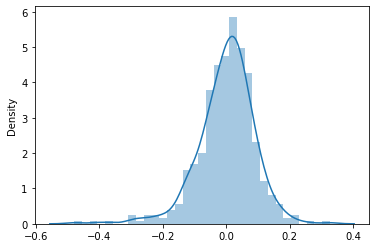

In [71]:
res = y_train - y_train_pred
sns.distplot(res)

## Prediction and Evaluation on the Test Set

In [72]:
num_vars = ['temp','atemp','hum','windspeed','days','cnt']

#2 Fit on Data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thrus,weekday_Tues,weekday_Wed,weathersit_Cloudy,weathersit_Thunderstorm
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0.252747,0,...,0,0,0,0,0,0,1,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0.734890,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0.410714,0,...,1,0,0,0,0,0,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0.303571,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0.208791,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thrus,weekday_Tues,weekday_Wed,weathersit_Cloudy,weathersit_Thunderstorm
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.490559,0.254545,...,0.086364,0.086364,0.145455,0.177273,0.118182,0.100000,0.127273,0.168182,0.318182,0.027273
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.294116,0.436599,...,0.281541,0.281541,0.353363,0.382770,0.323559,0.300684,0.334038,0.374881,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.004121,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.234203,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.480082,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.740041,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.001374,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [74]:
y_test = df_test.pop('cnt')
X_test = df_test

In [75]:
# add a constant to X_test
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,days,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thrus,weekday_Tues,weekday_Wed,weathersit_Cloudy,weathersit_Thunderstorm
184,1.0,0,1,0,0.831783,0.769660,0.657364,0.084219,0.252747,0,...,0,0,0,0,0,0,1,0,1,0
535,1.0,1,0,1,0.901354,0.842587,0.610133,0.153728,0.734890,0,...,0,0,0,0,0,1,0,0,0,0
299,1.0,0,0,1,0.511964,0.496145,0.837699,0.334206,0.410714,0,...,1,0,0,0,0,0,0,0,1,0
221,1.0,0,0,1,0.881625,0.795343,0.437098,0.339570,0.303571,0,...,0,0,0,0,0,1,0,0,0,0
152,1.0,0,0,1,0.817246,0.741471,0.314298,0.537414,0.208791,0,...,0,0,0,0,0,0,0,0,0,0


### R-Square

In [76]:
X_test_sm = X_test_sm.drop(['atemp','holiday','workingday','hum','days','season_summer','mnth_Mar','mnth_Jun','mnth_May','mnth_Oct','mnth_Aug','weekday_Wed','weekday_Thrus','weekday_Sat','weekday_Sun'],axis=1)

In [77]:
y_test_pred = lr_model.predict(X_test_sm)

In [78]:
r2_score(y_true=y_test , y_pred=y_test_pred) 

0.825376364050836

### Analysing the above model, the comapany should focus on the following features:
- Company should focus on expanding business during Spring & Winter.
- Company should focus on expanding business in the month of 'Jan', 'Feb', 'Jul', 'Sept', 'Nov' & 'Dec'.
- Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
- booking for bike will increase when the weather will be cloudy, light snow.